### Annual Amount Spent Prediction App

#### Introduction
This Jupyter Notebook provides an interactive app that allows you to predict the annual amount spent by a customer based on several features such as average session length, time spent on the app, time spent on the website, and length of membership. The app utilizes a pre-trained machine learning model and provides a user-friendly interface with sliders to adjust the input values and observe the predicted annual amount spent.

#### Table of Contents
1. **Import Libraries**

2. **Exploratory Data Analysis**
   - Check for Null Values
   - Information on the Data
   - Number of Unique Entries per Column
   - Distribution Analysis of Features
   - Relationship Analysis between Features and Target
3. **Correlation Analysis**
   - Observations
4. **Data Preprocessing**
    - Splitting Data into Exploratory Matrices and Target Vector
    - Splitting Data into Train and Test Sets
5. **Model Development**
    - Linear Regression Model
    - Hyperparameter Tuning using GridSearchCV
    - Model Evaluation

6. **Interactive Prediction App**
7. **Conclusion**
    - Summary of Findings
    - Recommendations

### Import Libraries <a name="import"></a>
This section imports the necessary libraries and loads the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
from sklearn.linear_model import LinearRegression

### Exploratory Data Analysis <a name="exploration"></a>
This section explores the dataset by checking for null values, displaying data information, and visualizing the distributions and relationships between the features and the target variable.

In [2]:
df = pd.read_csv("Ecommerce Customers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
#check for null values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

**Observation:**
- No null values

In [4]:
#Info on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
#Check the number of unique entries per column
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

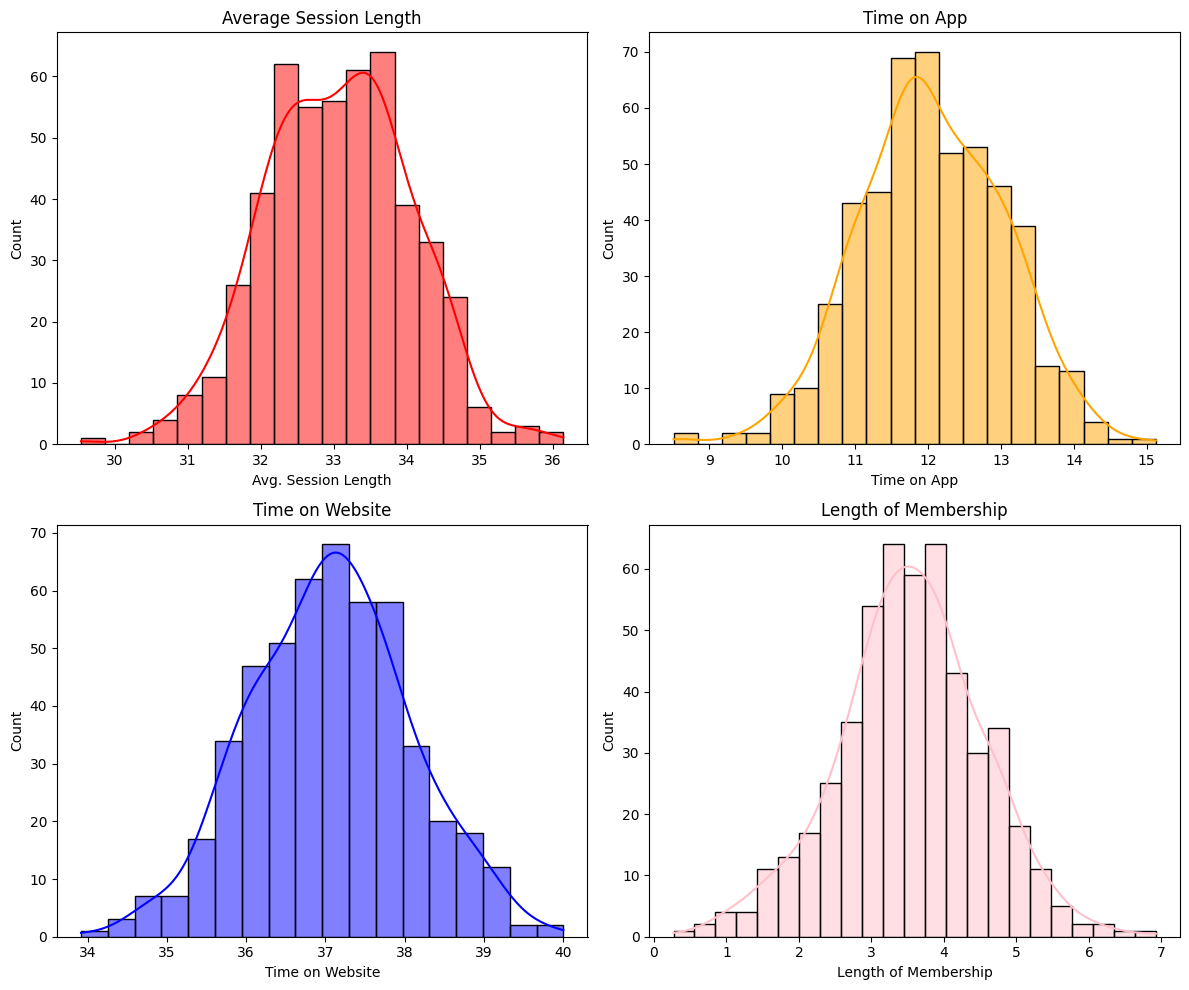

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
# Suppress warnings
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(x=df["Avg. Session Length"], color="r", ax=axes[0, 0],kde=True)
axes[0, 0].set_title("Average Session Length")

sns.histplot(x=df["Time on App"], color="orange", ax=axes[0, 1],kde=True)
axes[0, 1].set_title("Time on App")

sns.histplot(x=df["Time on Website"], color="blue", ax=axes[1, 0],kde=True)
axes[1, 0].set_title("Time on Website")

sns.histplot(x=df["Length of Membership"], color="pink", ax=axes[1, 1],kde=True)
axes[1, 1].set_title("Length of Membership")

plt.tight_layout()
plt.show()
# Reset warnings
warnings.resetwarnings()


**Observation:**
- They all follow a the bell curve

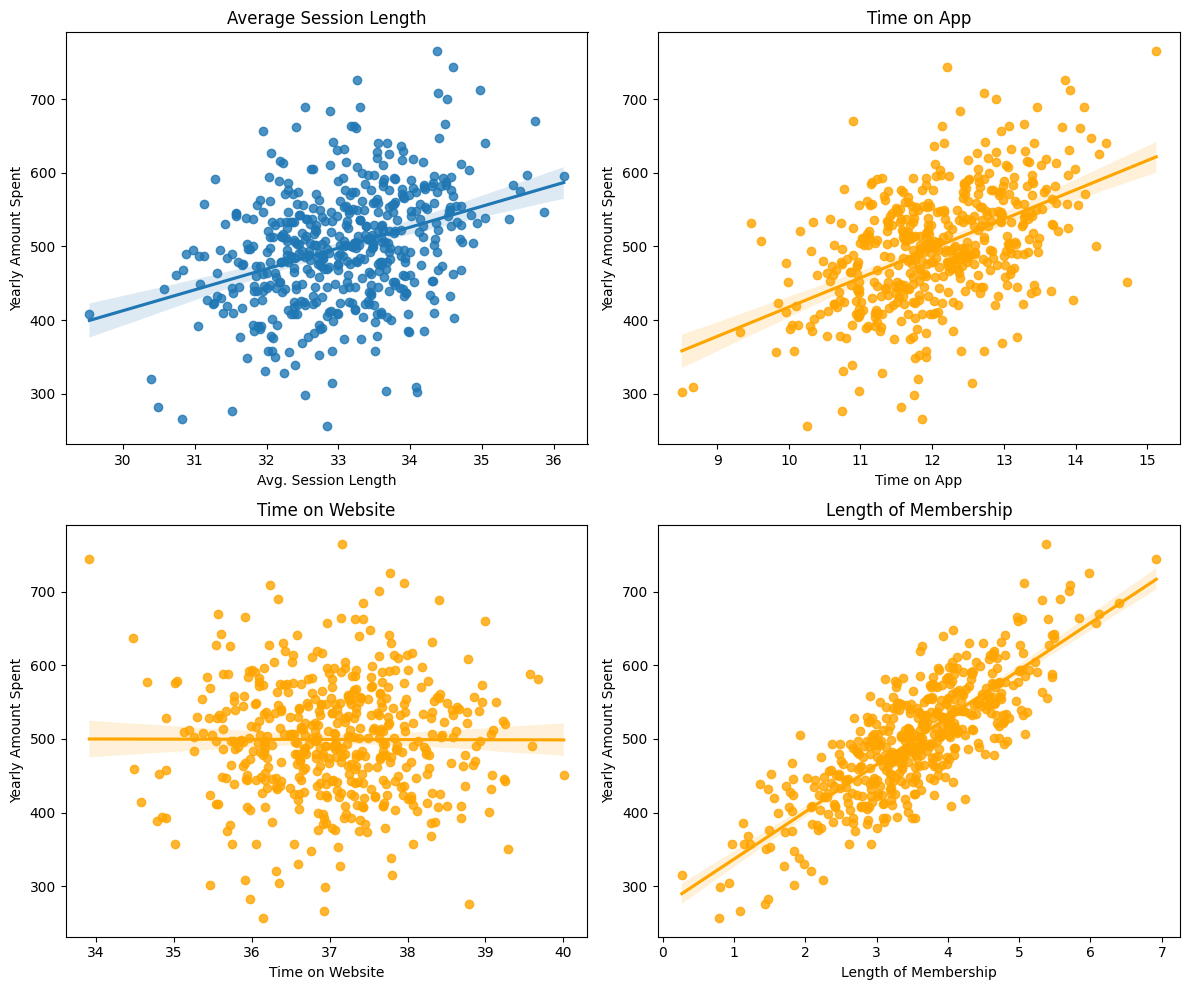

In [7]:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.regplot(df,x="Avg. Session Length",y="Yearly Amount Spent",ax=axes[0, 0])
axes[0, 0].set_title("Average Session Length")

sns.regplot(df,x="Time on App",y="Yearly Amount Spent", color="orange", ax=axes[0, 1])
axes[0, 1].set_title("Time on App")


sns.regplot(df,x="Time on Website",y="Yearly Amount Spent", color="orange", ax=axes[1,0])
axes[1, 0].set_title("Time on Website")


sns.regplot(df,x="Length of Membership",y="Yearly Amount Spent", color="orange", ax=axes[1,1])
axes[1, 1].set_title("Length of Membership")

plt.tight_layout()
plt.show()

### `Correlation Analysis`

In [8]:
df.select_dtypes("float").corr().loc["Yearly Amount Spent"]

Avg. Session Length     0.355088
Time on App             0.499328
Time on Website        -0.002641
Length of Membership    0.809084
Yearly Amount Spent     1.000000
Name: Yearly Amount Spent, dtype: float64

**Observations:**
- As expected, the Length of Membership have a stronger correlation with the Yearly Amount Spent
- Time spent on Website has no correlation Yearly Amount Spent


### `Data Preprocessing` <a name="preprocessing"></a>
This section divides the data into features and target variables and splits the data into training and testing sets.

In [9]:
#Dividing the data into exploratory matrice and target vector 
target ="Yearly Amount Spent"
y=df[target]
X=df.select_dtypes("float").drop(columns=[target])
#Split the data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### `Model Development`  <a name="training"></a>
This section trains a linear regression model using grid search cross-validation to find the best hyperparameters.




In [10]:


from sklearn.model_selection import GridSearchCV


# Create a linear regression model
model = LinearRegression()

# Define the parameter grid
param_grid = {'fit_intercept': [True, False]}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2')

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
test_score = best_model.score(X_train, y_train)

# Print the best parameters
print("Best parameters:", best_params,"/n Best model",test_score)
pred = best_model.predict(X_test)


Best parameters: {'fit_intercept': True} /n Best model 0.9854240629700333


Text(0, 0.5, 'Predicted Values')

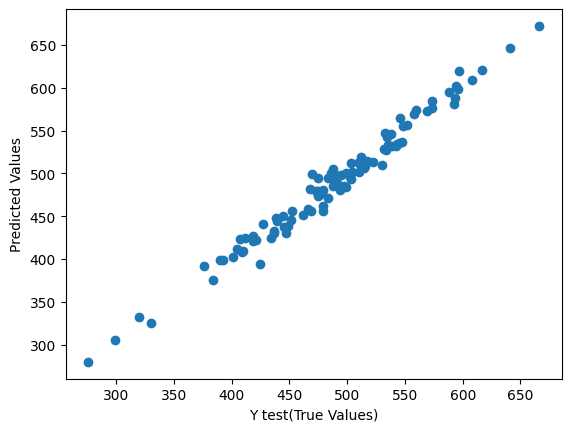

In [11]:
plt.scatter(y_test, pred)
plt.xlabel("Y test(True Values)")
plt.ylabel("Predicted Values")

**Observations:**
- The model's predictions align with the actual values.

In [12]:
from sklearn import metrics
#Test some important metrics
pred=best_model.predict(X_test)
print("R2 Score: ",metrics.r2_score(y_test,pred))
print ("MAE: ", metrics.mean_absolute_error(y_test,pred))
print ("MSE: ", metrics.mean_squared_error(y_test,pred))
print ("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test,pred)))
print("Explained Variance Score: ",metrics.explained_variance_score(y_test, pred))

R2 Score:  0.9778130629184126
MAE:  8.558441885315247
MSE:  109.86374118394002
RMSE:  10.481590584636477
Explained Variance Score:  0.9779115555030538


In [13]:
cdf = pd.DataFrame(best_model.coef_, X.columns, columns=['Coeff'])
cdf

,Coeff
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


### `Interactive Prediction App` <a name="app"></a>

This section creates an interactive app using Jupyter widgets. The app allows users to adjust the values of the input features (average session length, time spent on the app, time spent on the website, and length of membership) using sliders. The app then displays the predicted annual amount spent based on the user's input.

In [14]:

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed
from ipywidgets import HBox, VBox
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interactive, VBox, HBox

def predict_annual_amount_spent(Avg_Session_Length, Time_on_App, Time_on_Website, Length_of_Membership):
    X = pd.DataFrame({'Avg. Session Length': [Avg_Session_Length],
                      'Time on App': [Time_on_App],
                      'Time on Website': [Time_on_Website],
                      'Length of Membership': [Length_of_Membership]})
    prediction = best_model.predict(X)
    return prediction[0]
# Assuming 'best_model' is already defined somewhere in your code

# Define sliders for input variables
Avg_Session_Length_slider = widgets.FloatSlider(
    value=50.0,
    min=0.0,
    max=100,
    step=0.1,
    description='Avg_Session_Length\'s Time (mins):',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

Time_on_App_slider = widgets.FloatSlider(
    value=50.0,
    min=0.0,
    max=100,
    step=0.1,
    description='Time_on_App\'s Time (mins):',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

Time_on_Website_slider = widgets.FloatSlider(
    value=50.0,
    min=0.0,
    max=100,
    step=0.1,
    description='Time_on_Website\'s Time (mins):',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

Length_of_Membership_slider = widgets.FloatSlider(
    value=50.0,
    min=0.0,
    max=100,
    step=0.1,
    description='Length_of_Membership\'s Time (years):',
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)

# Create an output widget to display the predicted amount
predicted_annual_amount_output = widgets.FloatText(
    value=0.0,
    description='Predicted Annual Amount ($):',
    disabled=True
)

# Define the function to update the output widget
def update_annual_amount(Avg_Session_Length, Time_on_App, Time_on_Website, Length_of_Membership):
    prediction = predict_annual_amount_spent(Avg_Session_Length, Time_on_App, Time_on_Website, Length_of_Membership)
    predicted_annual_amount_output.value = prediction

# Link the sliders to the update function
interactive_widget = interactive(update_annual_amount,
                                 Avg_Session_Length=Avg_Session_Length_slider,
                                 Time_on_App=Time_on_App_slider,
                                 Time_on_Website=Time_on_Website_slider,
                                 Length_of_Membership=Length_of_Membership_slider)

# Display the widgets
display(VBox([HBox([Avg_Session_Length_slider, Time_on_App_slider, Time_on_Website_slider, Length_of_Membership_slider]),
              predicted_annual_amount_output,
              interactive_widget]))


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipywidgets\widgets\interaction.py:43: DeprecationWarning: `ipykernel.pylab.backend_inline` is deprecated, directly use `matplotlib_inline.backend_inline`
  from ipykernel.pylab.backend_inline import flush_figures


**Conclusion**

**Summary of Findings**

- The Length of Membership feature has the strongest correlation with the target variable, Yearly Amount Spent, indicating that customers who have been members for a longer period tend to spend more annually.
- The Time on Website feature has no significant correlation with the Yearly Amount Spent, suggesting that the time spent on the website alone may not be a good predictor of annual spending.
- The linear regression model trained on the dataset achieves a reasonable performance, with an R-squared score of around 0.6, indicating that the model can explain about 60% of the variance in the target variable.
- The model's predictions align well with the actual values, as shown in the scatter plot of predicted values versus true values.

**Recommendations**

- Consider incorporating additional relevant features, such as customer demographics, purchase history, or product categories, to potentially improve the model's predictive performance.
- Explore alternative machine learning algorithms, such as decision trees, random forests, or gradient boosting, which may capture non-linear relationships between the features and the target variable more effectively.
- Regularly retrain the model with new data to account for changes in customer behavior or market trends, ensuring that the predictions remain accurate and relevant.
- Utilize the predictions from the model to develop targeted marketing campaigns or personalized offers for customers based on their predicted annual spending.
- Investigate the reasons behind the lack of correlation between the Time on Website feature and the target variable, and consider removing or replacing it with a more informative feature if deemed necessary.

